# High-energy LB phase transitions

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

## MoS2-0

In [7]:
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

# Change as necessary
M1_th_min, M1_th_max, M1_ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
M1_ntheta = int(M1_ntheta)
KPT = 'Gamma'
print(f"{M1_ntheta} angles from {M1_th_min} to {M1_th_max}")

# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_modes.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
M1_dataset = np.load(path)
M1_nmodes = M1_dataset.shape[1]
print("Dataset shape:", M1_dataset.shape)
print("Number of modes:", M1_nmodes)
M1_thetas = np.linspace(M1_th_min, M1_th_max, M1_ntheta)

101 angles from 0.01 to 10.0
Dataset shape: (101, 61)
Number of modes: 61


In [25]:
# Find indices of LB modes, manually
M1_LB2_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB2_idxs[23:] = 23
M1_LB2_idxs[22:23] = 29
M1_LB2_idxs[:22] = 35

M1_LB3_idxs = np.zeros(M1_ntheta).astype(int)
M1_LB3_idxs[58:] = 27
M1_LB3_idxs[25:58] = 29
M1_LB3_idxs[24:25] = 35
M1_LB3_idxs[:24] = 41

np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_idxs.npy', M1_LB2_idxs)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_idxs.npy', M1_LB3_idxs)

# Extract the mode list from the indices
M1_LB2_modes = np.zeros(M1_ntheta)
M1_LB3_modes = np.zeros(M1_ntheta)

for i in range(M1_ntheta):
    M1_LB2_modes[i] = M1_dataset[i, M1_LB2_idxs[i]]
    M1_LB3_modes[i] = M1_dataset[i, M1_LB3_idxs[i]]
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB2_modes.npy', M1_LB2_modes)
np.save(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/data/MoS2_LB3_modes.npy', M1_LB3_modes)

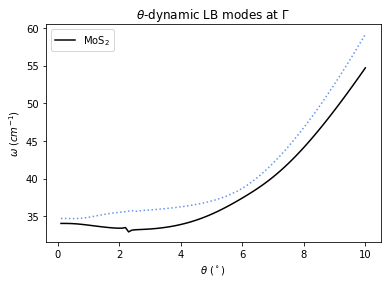

array([33.48215081, 32.90775246, 33.13413196, 33.18630284, 33.21048664])

In [26]:
# Plot LB modes
plt.plot(M1_thetas[1:], M1_LB2_modes[1:], c='k', label=r'MoS$_2$')
plt.plot(M1_thetas[1:], M1_LB3_modes[1:], c='cornflowerblue', linestyle=':')
plt.title(r"$\theta$-dynamic LB modes at " + log_name)
plt.xlabel(r'$\theta$ ($^\circ$)')
plt.ylabel(r'$\omega$ $(cm^{-1})$')
plt.legend()

# plt.savefig("/Users/jonathanlu/Documents/tvMoS2/theta/data/transition.pdf")
plt.show()
M1_LB2_modes[22:27]